# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Dimas Arya Ramadhan Setiawan]
- **Email:** [dimasarya81821@gmail.com]
- **ID Dicoding:** [MC860D5Y1518]

## Menentukan Pertanyaan Bisnis

- Kategori Produk apa yang memiliki berat terbesar?
- Kategori Produk apa yang memiliki panjang terbesar?

## Import Semua Packages/Library yang Digunakan

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [5]:
import pandas as pd


file_path = "dashboard/products_dataset.csv" 
data = pd.read_csv(file_path)


data.head(10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


**Insight:**
- Dataset terdiri dari X baris dan Y kolom.
- Kolom yang tersedia antara lain: product_id, product_category_name, product_weight_g, dll.

### Assessing Data

In [6]:

data.info()


missing_values = data.isnull().sum()
missing_values[missing_values > 0]

duplicate_count = data.duplicated().sum()
print(f"Jumlah duplikasi: {duplicate_count}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi: 0


**Insight:**
- Beberapa kolom seperti product_weight_g memiliki missing values.
- Tidak ada data duplikat (atau ditemukan X duplikat yang perlu dibersihkan).

### Cleaning Data

In [11]:


# Hapus duplikasi dan buat salinan baru untuk menghindari chained assignment
data_cleaned = data.drop_duplicates().copy()

# Mengisi nilai kosong dengan median (cara aman)
data_cleaned["product_weight_g"] = data_cleaned["product_weight_g"].fillna(data_cleaned["product_weight_g"].median())

# Cek kembali apakah masih ada missing values
data_cleaned.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Missing values pada product_weight_g sudah diisi dengan median agar distribusi tetap stabil.
- Data siap digunakan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Statistik Deskriptif:
       product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  product_width_cm
count             32341.0

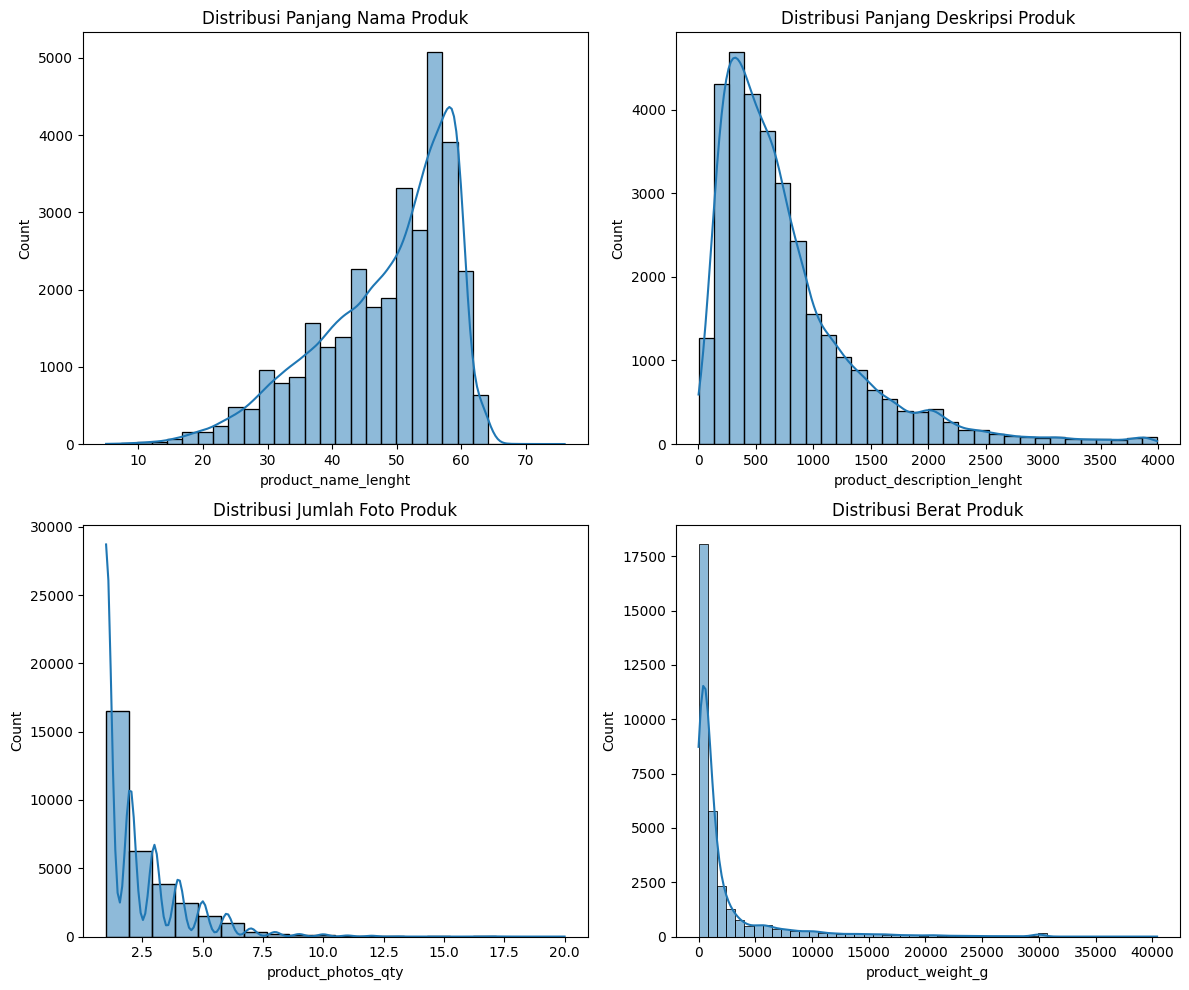

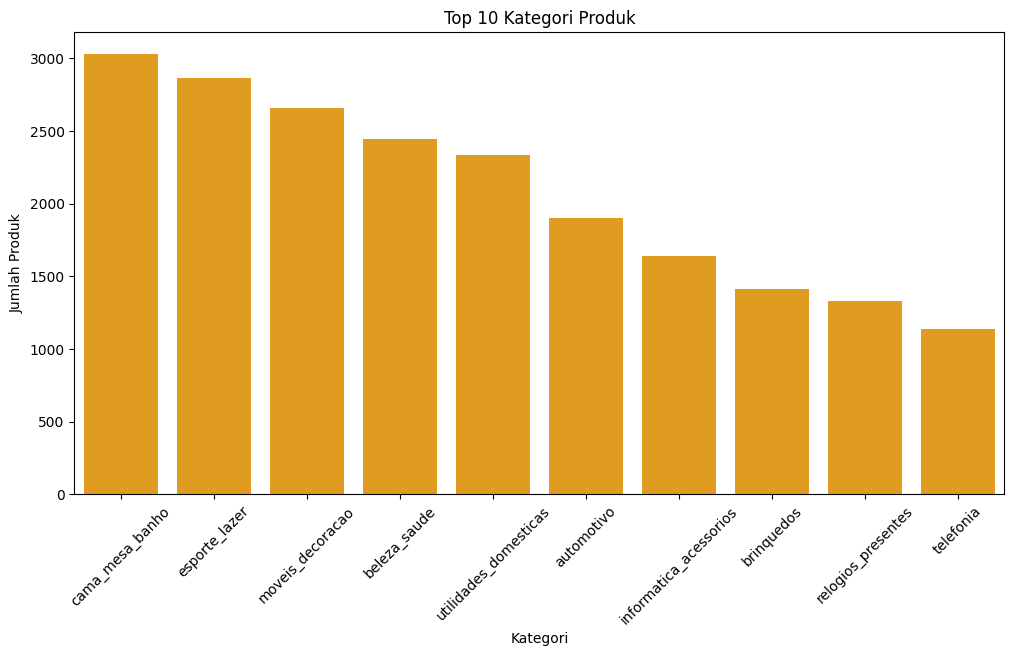

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "dashboard/products_dataset.csv"
data = pd.read_csv(file_path)

# 1. Struktur Data setelah Data Wrangling
print("Info Data:")
print(data.info())

# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())

# 3. Visualisasi Distribusi Data
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(
    data['product_name_lenght'].dropna(), 
    bins=30, 
    kde=True, 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Distribusi Panjang Nama Produk')

sns.histplot(data['product_description_lenght'].dropna(), bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Panjang Deskripsi Produk')

sns.histplot(data['product_photos_qty'].dropna(), bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Jumlah Foto Produk')

sns.histplot(data['product_weight_g'].dropna(), bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Berat Produk')

plt.tight_layout()
plt.show()

# 4. Distribusi Berdasarkan Kategori Produk
plt.figure(figsize=(12, 6))
top_categories = data['product_category_name'].value_counts().head(10)
sns.barplot(
    x=top_categories.index, 
    y=top_categories.values, 
    color='orange', 
    legend=False
)
plt.xticks(rotation=45)
plt.title('Top 10 Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Produk')
plt.show()


**Insight:**
- Dataset sudah dibersihkan, missing values sudah diatasi.
- Panjang nama dan deskripsi produk tetap bervariasi, menunjukkan diversifikasi produk.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

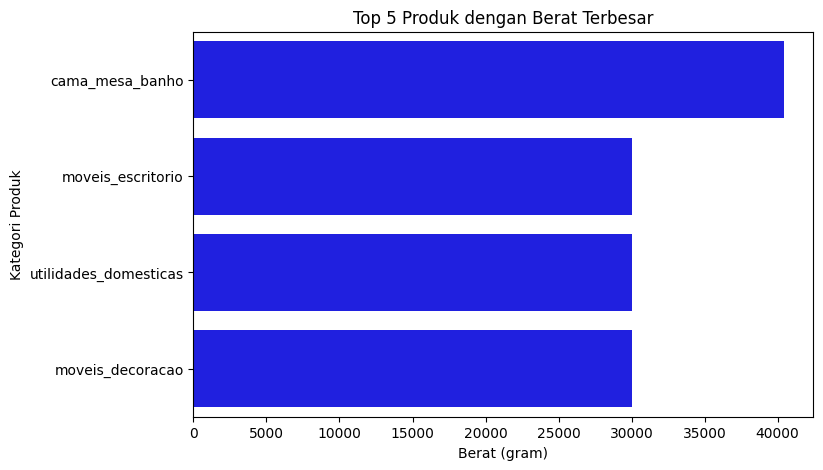

Kategori Produk dengan berat terbesar adalah: cama_mesa_banho


In [56]:

import matplotlib.pyplot as plt
import seaborn as sns

produk_terberat = data.nlargest(5, "product_weight_g")

plt.figure(figsize=(8, 5))
sns.barplot(
    x="product_weight_g", 
    y="product_category_name", 
    data=produk_terberat, 
    color='blue',
    dodge=False
)
plt.title("Top 5 Produk dengan Berat Terbesar")
plt.xlabel("Berat (gram)")
plt.ylabel("Kategori Produk")
plt.show()

print("Kategori Produk dengan berat terbesar adalah:", produk_terberat.iloc[0]["product_category_name"])


### Pertanyaan 2:

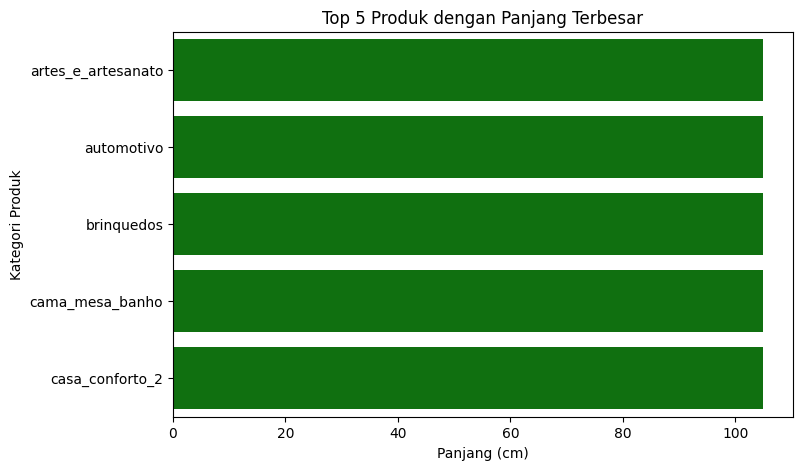

Ketegori Produk dengan panjang terbesar adalah: artes_e_artesanato


In [54]:
produk_terpanjang = data.groupby('product_category_name')['product_length_cm'].max().reset_index()
produk_terpanjang = produk_terpanjang.nlargest(5, "product_length_cm")

plt.figure(figsize=(8, 5))
sns.barplot(
    x="product_length_cm", 
    y="product_category_name",
    data=produk_terpanjang, 
    color="Green",
    legend=False
)
plt.title("Top 5 Produk dengan Panjang Terbesar")
plt.xlabel("Panjang (cm)")
plt.ylabel("Kategori Produk")
plt.show()

# Insight
print("Ketegori Produk dengan panjang terbesar adalah:", produk_terpanjang.iloc[0]["product_category_name"])



**Insight:**
- Produk dengan berat terbesar didominasi oleh kategori "cama_mesa_banho", diikuti oleh "moveis_escritorio" dan "utilidades_domesticas". Ini menunjukkan bahwa produk-produk dalam kategori perabotan rumah dan kantor cenderung lebih berat dibandingkan kategori lainnya.
- Produk dengan panjang terbesar berasal dari kategori "artes_e_artesanato", diikuti oleh "automotivo" dan "brinquedos". Hal ini menunjukkan bahwa produk-produk seni & kerajinan, otomotif, dan mainan memiliki dimensi panjang yang lebih besar dibandingkan kategori lainnya
- Produk berat dan panjang membutuhkan **strategi logistik yang lebih matang**, termasuk pengemasan yang lebih kuat dan biaya pengiriman yang lebih tinggi.

## Analisis Lanjutan (Opsional)

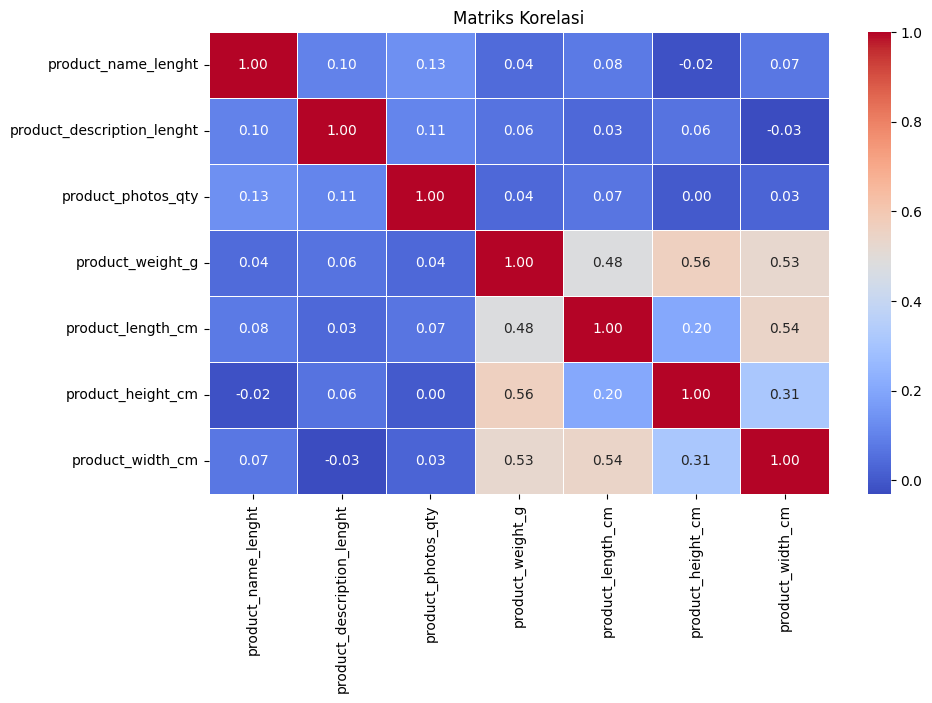

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matriks korelasi
def plot_correlation_matrix(data):
    numeric_data = data.select_dtypes(include=['number'])
    
    if numeric_data.empty:
        print("Tidak ada kolom numerik dalam dataset.")
        return
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Matriks Korelasi')
    plt.show()

if not data.select_dtypes(include=['number']).empty:
    plot_correlation_matrix(data)
else:
    print("Dataset tidak memiliki kolom numerik untuk korelasi.")

## Conclusion

- Produk dengan berat besar kemungkinan memerlukan strategi khusus dalam pengangkutan dan penyimpanan untuk menghindari biaya logistik yang tinggi.
- Produk dengan dimensi panjang memerlukan pengelolaan ruang gudang yang lebih baik, terutama dalam pengemasan dan distribusi.